In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataset=pd.read_csv("/content/Social_Network_Ads.csv")
dataset

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [20]:
dataset.drop(columns=['UserID', 'Gender'], inplace=True)

In [21]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

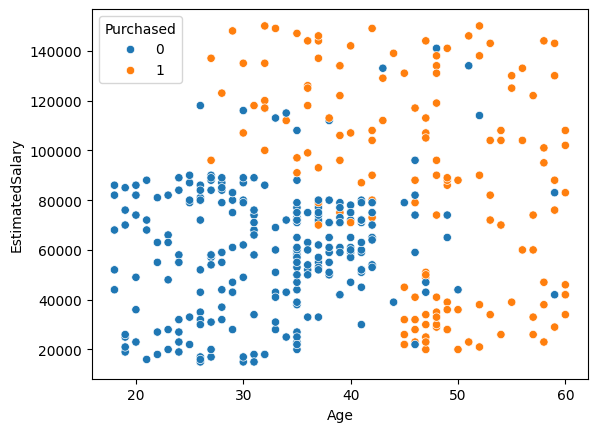

In [22]:
sns.scatterplot(data=dataset, x='Age', y='EstimatedSalary', hue='Purchased')
plt.show()

In [23]:
x=dataset.iloc[:,:-1]
y=dataset['Purchased']

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x), columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
# we use max_depth to it become less overfitted that technique called as pre pruning
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
dt.score(x_test, y_test)*100

90.0

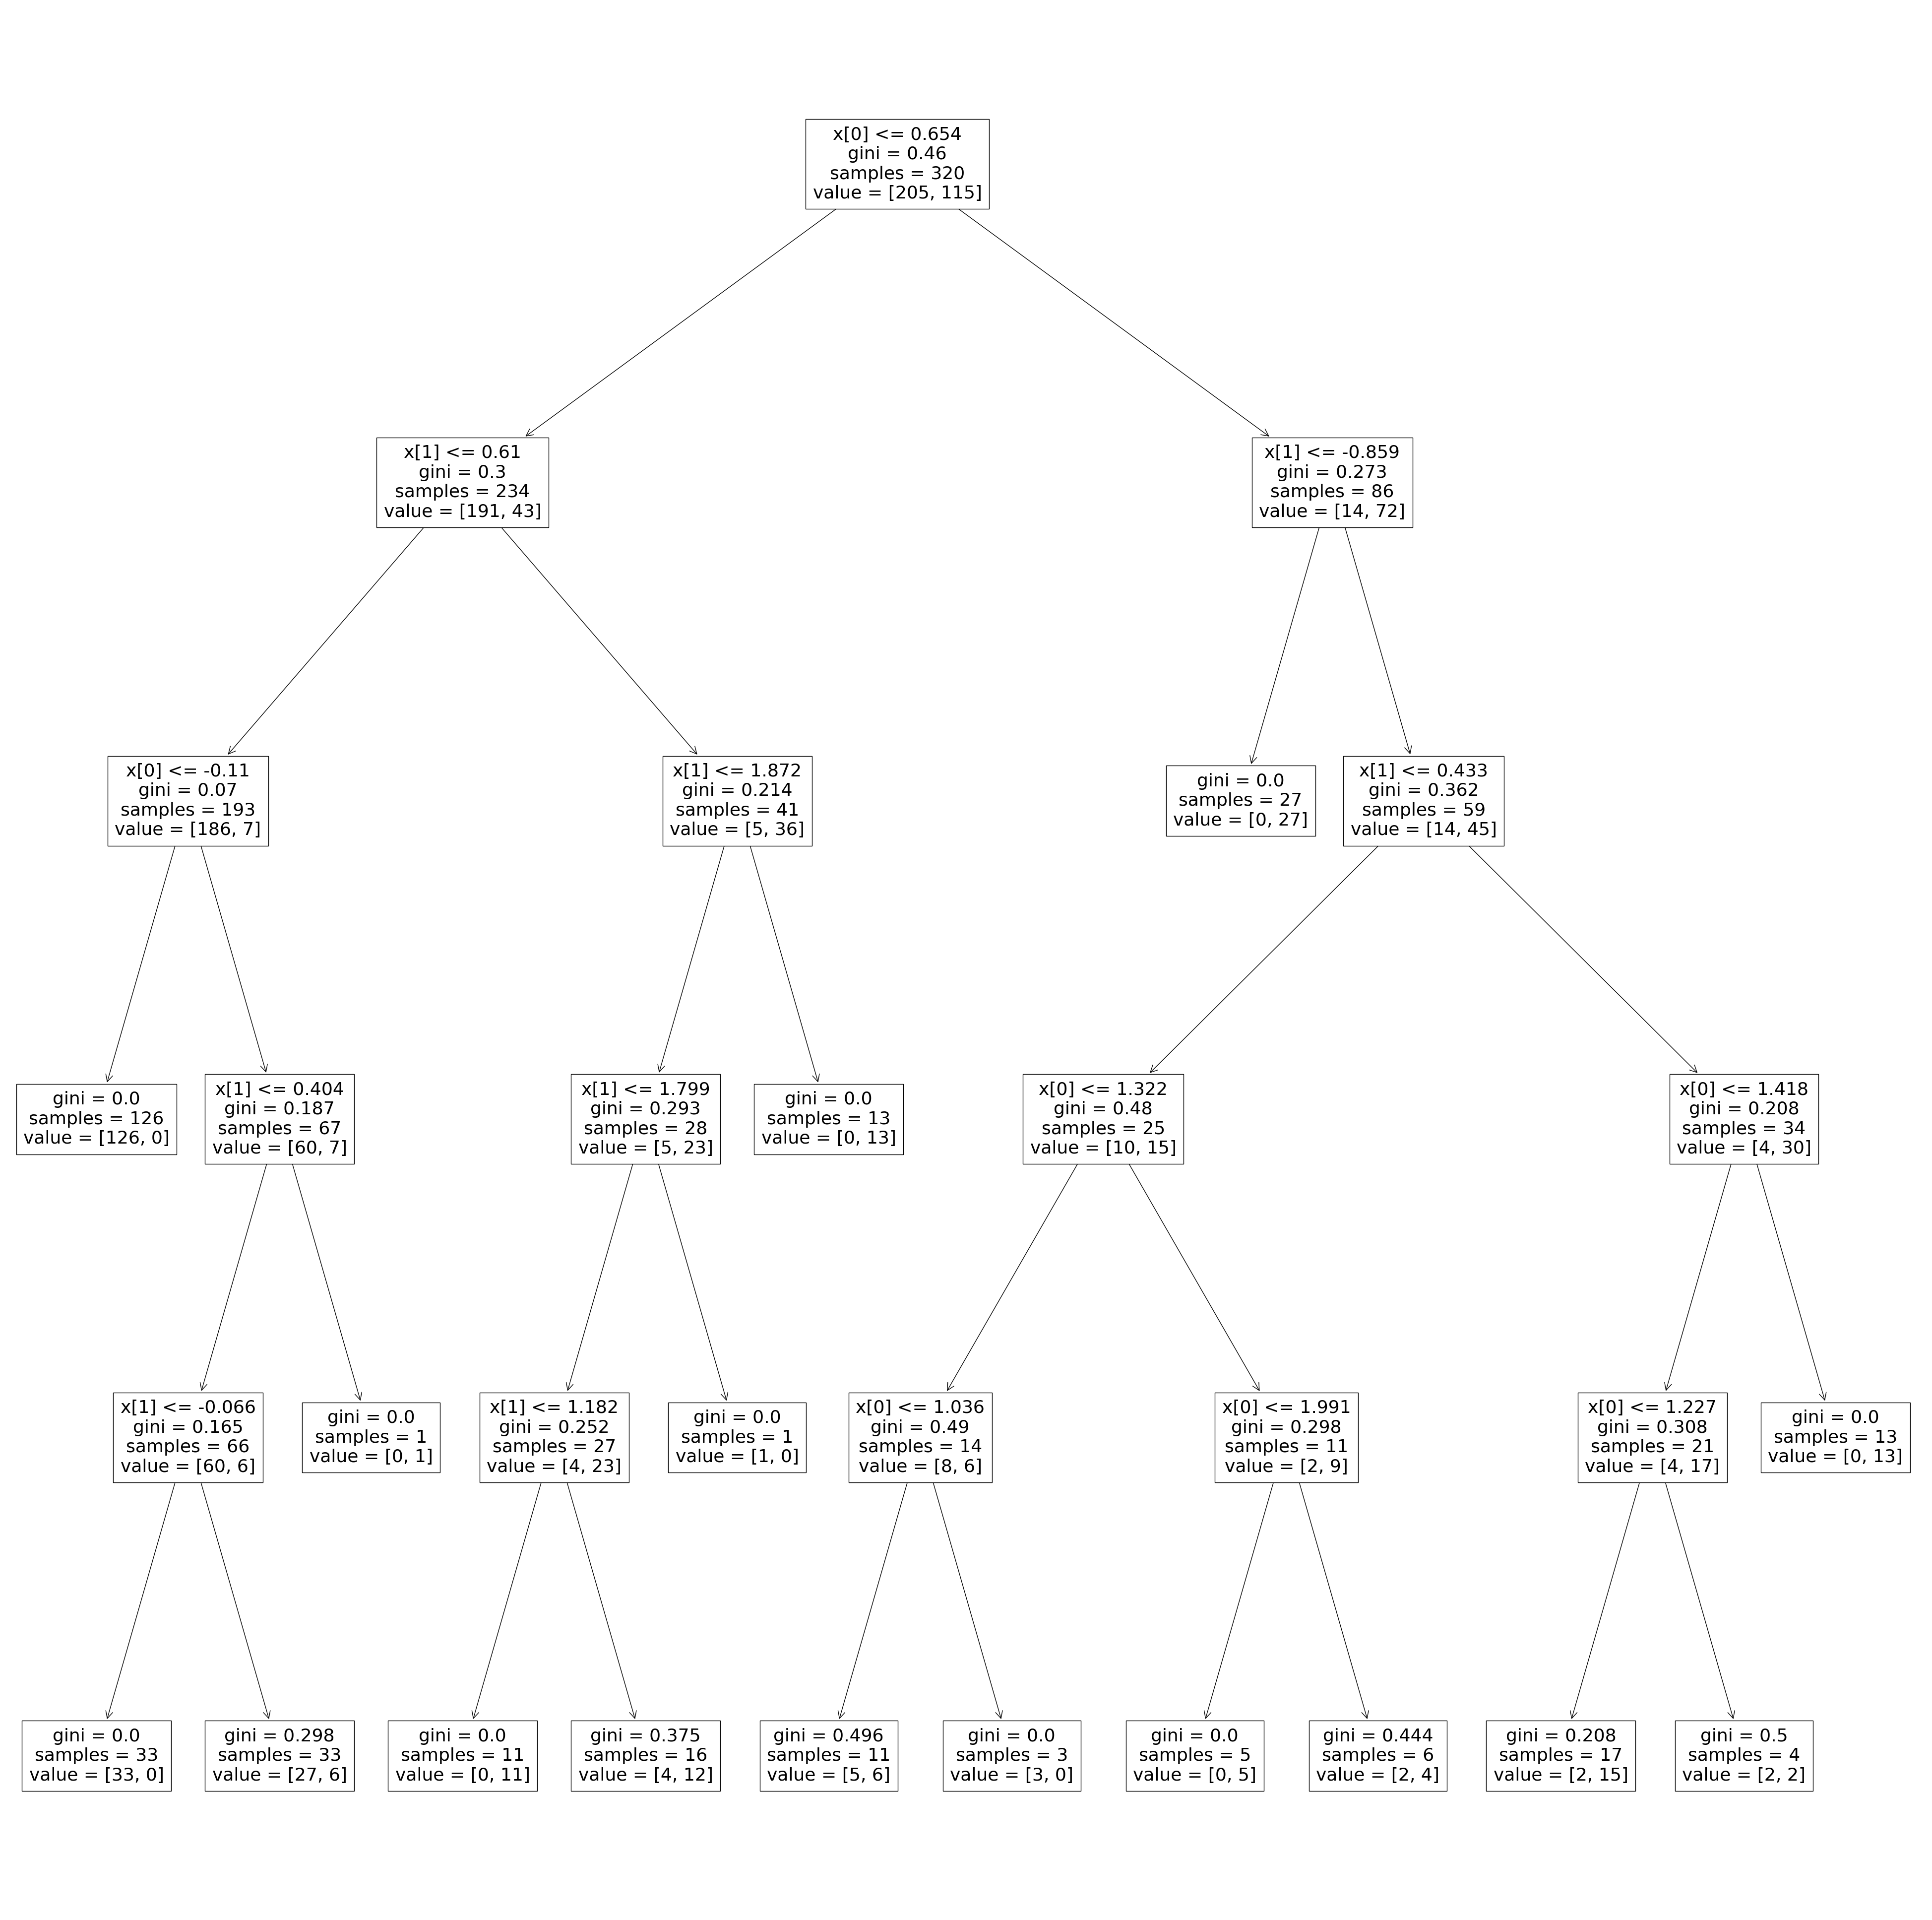

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 50))
plot_tree(dt)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

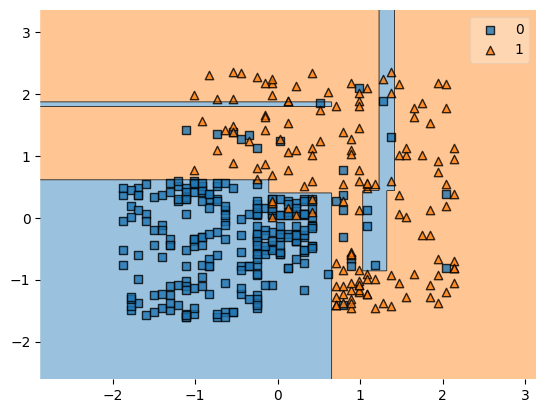

In [40]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt)

In [29]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [30]:
dt1.score(x_test, y_test)*100

83.75

In [35]:
# to check overfitting , when we found the difference between train and test

dt.score(x_train, y_train)*100

99.6875

In [36]:
dt.score(x_test, y_test)*100
# it is overfitted because we check both accuracy of train and test and we found the difference so it means it is overfitted


83.75

In [49]:
# post pruning

for i in range(1, 20):
  dt2=DecisionTreeClassifier(max_depth=i)
  dt2.fit(x_train, y_train)
  print(dt2.score(x_train, y_train), dt2.score(x_test, y_test), i)

0.821875 0.9 Root: 1
0.91875 0.9125 Root: 2
0.91875 0.9125 Root: 3
0.93125 0.9125 Root: 4
0.934375 0.9 Root: 5
0.95 0.8625 Root: 6
0.96875 0.85 Root: 7
0.971875 0.85 Root: 8
0.98125 0.85 Root: 9
0.984375 0.85 Root: 10
0.990625 0.8375 Root: 11
0.99375 0.8375 Root: 12
0.996875 0.8375 Root: 13
0.996875 0.8375 Root: 14
0.996875 0.8375 Root: 15
0.996875 0.8375 Root: 16
0.996875 0.8375 Root: 17
0.996875 0.8375 Root: 18
0.996875 0.8375 Root: 19


In [51]:
# post pruning

for i in range(1, 20):
  dt2=DecisionTreeClassifier(max_depth=i)
  dt2.fit(x_train, y_train)
  print("Train :", dt2.score(x_train, y_train)*100, "Test :",  dt2.score(x_test, y_test)*100,'Root:', i)

Train : 82.1875 Test : 90.0 Root: 1
Train : 91.875 Test : 91.25 Root: 2
Train : 91.875 Test : 91.25 Root: 3
Train : 93.125 Test : 91.25 Root: 4
Train : 93.4375 Test : 90.0 Root: 5
Train : 95.0 Test : 86.25 Root: 6
Train : 96.875 Test : 85.0 Root: 7
Train : 97.5 Test : 85.0 Root: 8
Train : 98.125 Test : 85.0 Root: 9
Train : 98.4375 Test : 85.0 Root: 10
Train : 99.0625 Test : 83.75 Root: 11
Train : 99.0625 Test : 83.75 Root: 12
Train : 99.6875 Test : 83.75 Root: 13
Train : 99.6875 Test : 83.75 Root: 14
Train : 99.6875 Test : 83.75 Root: 15
Train : 99.6875 Test : 83.75 Root: 16
Train : 99.6875 Test : 83.75 Root: 17
Train : 99.6875 Test : 83.75 Root: 18
Train : 99.6875 Test : 83.75 Root: 19


In [52]:
# from the post pruning we find the best max_depth so in it 2, and 3 is best so we use
# it in the pre pruning code that i will write in bottom

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [53]:
dt.score(x_train, y_train)

0.91875

In [54]:
dt.score(x_test, y_test)

0.9125